# Príprava dat
## Zadanie: 
Načtěte dataset a ujistěte se, že rozumíte hodnotám ve sloupcích. Můžete změnit názvy sloupců a odstranit z nich mezery, což se vám může později hodit.

## My solution
1. using pandas function read_csv to load data
2. preparing dataset by removing spaces in column names, renaming colums to use the same convention
    -  calling attribute of the DataFrame *.columns*, that holds the column names
    -  using StringMethods *str* that allows me applying string operations on the  array of column names
        - using method *.rename()* to change column names  to new column_mapping (dictionary)
        - using method *.strip()* to remove any spaces from each column name
        - using method *.replace(' ', '_')* to replace each space with an underscore 
3. checking dataset 
    - calling method .head() to display the first 5 rows
    - calling attribute .columns to display its column names


In [12]:
import pandas as pd # type: ignore

data = pd.read_csv("data/adm_data.csv")

# Remove spaces from column names
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Rename columns (same convention)
column_mapping = {
    'Serial_No.': 'Serial_Number',
    'GRE_Score': 'GRE_Score',
    'TOEFL_Score': 'TOEFL_Score',
    'University_Rating': 'University_Rating',
    'SOP': 'SOP',
    'LOR_': 'LOR',
    'CGPA': 'CGPA',
    'Research': 'Research',
    'Chance_of_Admit_': 'Chance_of_Admit'
}
data.rename(columns=column_mapping, inplace=True)

# Check the new column names and first few rows of data
data.head(), data.columns



(   Serial_Number  GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  \
 0              1        337          118                  4  4.5  4.5  9.65   
 1              2        324          107                  4  4.0  4.5  8.87   
 2              3        316          104                  3  3.0  3.5  8.00   
 3              4        322          110                  3  3.5  2.5  8.67   
 4              5        314          103                  2  2.0  3.0  8.21   
 
    Research  Chance_of_Admit  
 0         1             0.92  
 1         1             0.76  
 2         1             0.72  
 3         1             0.80  
 4         0             0.65  ,
 Index(['Serial_Number', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
        'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
       dtype='object'))

# Normalita dat pro TOEFL skóre
## Zadanie: 

1. Vypočítejte průměr a medián pro TOEFL skóre.
2. Vypočítejte směrodatnou odchylku.
3. Vytvořte histogram pro TOEFL skóre a nezapomeňte zobrazit odhadovanou křivku pravděpodobnostního rozdělení.
4. Otestujte, zda je TOEFL skóre vybráno z normálního rozdělení pomocí statistického testu. Uvažujte hladinu.

## My solution
1. using methods .mean() and .median() over the column TOEFL_Score
2. using method .std() over the TOEFL_Score column to calculate standard deviation and round it to 2 decimals
3. importing the libs seaborn and matplotlib, using 
    - plt.title, plt.xlabel and plt.ylabel to setting up the description of histogram
    - sns.histplot to create histogram over the column TOEFL_score
    - using parameter kde=True to display KDE curve to the histogram
    - setting number of gistogram bins by parameter bins and setting color of bins
    - using method *plt.axvline()* for adding lines for median and mean values displayed in histogram, and attributes
        -  *color* for setting lines colors,
        - *linestyle* for setting the lines styiling
        - *label* for setting info for legend()
4. defining hyphotesis and test the normality
    - Import the *normaltest* function with alias 'nt'
    - setting up the H0 and H1 hyphotesis
    - using alpha value 5% to count stat and p-value
    - compair alpha value and counted p-value and reject or actept hypothesis

In [13]:
# Calculate Mean, Median
mean_toefl = data['TOEFL_Score'].mean()
median_toefl = data['TOEFL_Score'].median()

mean_toefl, median_toefl

(107.41, 107.0)

In [14]:
# Calculate standard deviation for TOEFL Score
toefl_std = data['TOEFL_Score'].std()

# Round the standard deviation to 2 decimal places
toefl_std_rounded = round(toefl_std, 2)
toefl_std_rounded

6.07

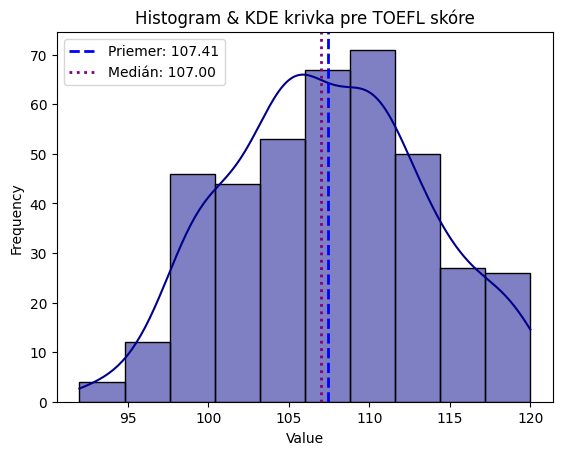

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an example plot
sns.histplot( data['TOEFL_Score'], kde=True, bins=10, color="darkblue")

plt.title("Histogram & KDE krivka pre TOEFL skóre")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Adding mean and median to the plot
plt.axvline(mean_toefl, color='blue', linestyle='dashed', linewidth=2, label=f"Priemer: {mean_toefl:.2f}")
plt.axvline(median_toefl, color='purple', linestyle='dotted', linewidth=2, label=f"Medián: {median_toefl:.2f}")

plt.legend()
plt.show()

In [16]:
from scipy.stats import normaltest as nt  

# Formulation of hypotheses:
# H0: Data follow a normal distribution
# H1: Data do not follow a normal distribution

alpha = 0.05

# Testing for normality using the DAgostino-Pearson test
stat, p_value = nt(data['TOEFL_Score'])

if p_value > alpha:
   print("TOEFL Score follows a normal distribution (failed to reject H0)")
else:
   print("TOEFL Score does not follow a normal distribution (reject H0)")

print("D'Agostino-Pearson Test:")
print(f"  stat = {stat:.3f}")
print(f"  p-value = {p_value:.3f}")



TOEFL Score does not follow a normal distribution (reject H0)
D'Agostino-Pearson Test:
  stat = 11.070
  p-value = 0.004


# Result task 1:
The p-value is lower than 0.05 (alpha = 0.05), indicating that we have sufficient evidence to reject the null hypothesis (H0).
This result suggests that the TOEFL Score data do not follow a normal distribution.

# Testování hypotéz
## Zadanie
1. Rozdělte data na studenty, kteří mají a nemají zkušenost s výzkumem.
2. Pro obě skupiny spočítejte průměrné GRE skóre.
3. Statisticky otestujte, zda existuje statisticky významný rozdíl v GRE skóre mezi těmito dvěma skupinami studentů. Vyberte správný test a nezapomeňte krátce okomentovat vyhodnocení testu.

## My solution
- importing method  *mannwhitneyutest* from scipy.stats and
1. dividing students based on research experience - 1 value in column 'Research' means they have experience, 0 they dont
2. calculating the average GRE score for both groups by using *mean()* method and rounding it to three decimal places.
3. the TOEFL scores do not follow a normal distribution, it raises a question about the distribution of the GRE scores as well. The t-test is sensitive to non-normal distributions, which can affect the accuracy  of its results, so I won't use it and will choose  Mann-Whitney test instead. 
    - using  *mannwhitneyutest* method for  Mann-Whitney U test to compare the GRE scores between the two groups. 
    - using parameter *alternative='two-sided'* to check for any difference in distributions, not just a one-sided difference
    - creating the visualization of results by using a boxplot to display the distribution of GRE scores across the two groups based on research experience

Average GRE score for students with research experience is: 322.854
Average GRE score for students without research experience is: 309.492

Statistical Testing of Difference in GRE Scores Between the Two Groups:
U-statistic: 33514.000
P-value: 0.000
There is a statistically difference in GRE scores between the two groups (reject H0).


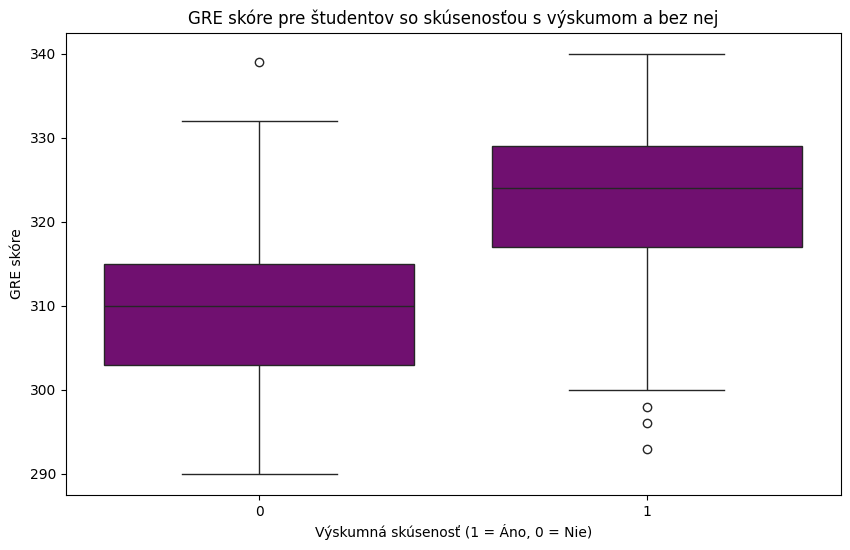

In [17]:
from scipy.stats import mannwhitneyu as mannwhitneyutest
data['Research'].head()

# Dividing students based on research experience 
students_with_research_experience = data[data['Research'] == 1]
students_without_research_experience = data[data['Research'] == 0]

# Calculating the average GRE score for both groups
mean_GRE_with_experience = students_with_research_experience['GRE_Score'].mean()
mean_GRE_without_experience = students_without_research_experience['GRE_Score'].mean()

print(f"Average GRE score for students with research experience is: {mean_GRE_with_experience:.3f}")
print(f"Average GRE score for students without research experience is: {mean_GRE_without_experience:.3f}")

# Statistical testing - Mann-Whitney U test for non-parametric independent samples
u_stat, p_value = mannwhitneyutest(students_with_research_experience['GRE_Score'], students_without_research_experience['GRE_Score'], alternative='two-sided')

alpha = 0.05

print("\nStatistical Testing of Difference in GRE Scores Between the Two Groups:")
print(f"U-statistic: {u_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("There is a statistically difference in GRE scores between the two groups (reject H0).")
else:
    print("There is no statistically difference in GRE scores between the two groups (fail to reject H0).")

# Visualization of Differences Between Students With and Without Research Experience
plt.figure(figsize=(10, 6))
sns.boxplot(x='Research', y='GRE_Score', data=data, color='purple')
plt.title("GRE skóre pre študentov so skúsenosťou s výskumom a bez nej")
plt.xlabel("Výskumná skúsenosť (1 = Áno, 0 = Nie)")
plt.ylabel("GRE skóre")
plt.show()

## Result Task 2:

The Mann-Whitney U test results, with a U-statistic of 33514.000 and a p-value of less than 0.001,  exceed the alpha threshold of 0.05. This indicates compelling evidence to reject the null hypothesis (H0). The findings clearly demonstrate that students with research experience have higher average GRE scores (322.854) compared to those without research experience (309.492). This statistically significant difference underscores the impact of research experience on enhancing GRE performance.

# Korelace

## Zadanie
1. Vypočítejte korelaci mezi TOEFL skóre a GRE skóre.
2. Krátce okomentujte, co znamená vypočítaná korelace. Je tato korelace vysoká, pozitivní/negativní?
3. Vytvořte korelační graf (sns.regplot) pro vysvětlovanou proměnnou šance na přijetí (Chance of Admit) a proměnnou, která je s ní nejvíce korelovaná.

## My solution:

1. using *.corr* method for calculating the statistical correlation (correlation coefficient) between 2bspecified columns  TOEFL scores and GRE scores of students
2. according the result of correlation coeficient -  0.836 - we can clasify it as strong {high} positive correlation between these 2 scores.
3. Creating a regression plot for Chance of Admit and the variable most correlated with it
    - finding the most correlated variable by finding out which variable in the dataset, apart from 'Chance_of_Admit' itself, has the strongest linear relationship ( positive or negative) with 'Chance_of_Admit'
    -  isolates the column from the correlation matrix that shows the correlation coefficients between 'Chance_of_Admit' and all other variables
    - Exclude Self-Correlation of the column Chance_of_Admin by using method  *.drop('Chance_of_Admit')*
    - find occurence of maximum correlation value by using method *idxmax()* that returns the index of that variable / column
    - creating regression plot where on x-axis lais this most correlated variable and on y-axis lais Chance_of_Admit.
    


Correlation between TEFL and GRE is: 0.836
The most correlated variable with 'Chance of Admit' is: CGPA with a correlation of: 0.873


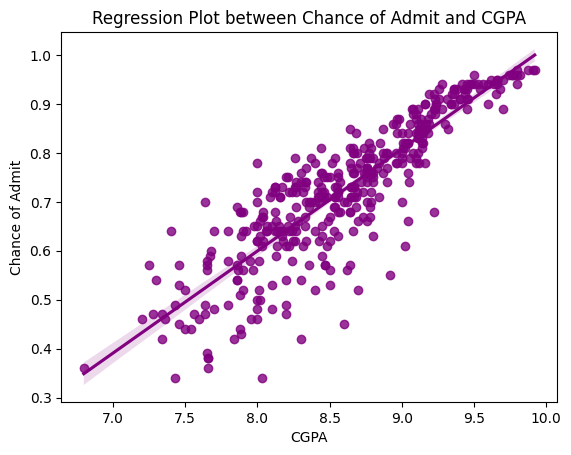

In [18]:
# Calculating the correlation between TOEFL and GRE scores
correlation = data['TOEFL_Score'].corr(data['GRE_Score'])
print(f"Correlation between TEFL and GRE is: {correlation:.3f}")

# Finding the variable most correlated with Chance of Admit
correlation_with_admit_notexclude = data.corr()['Chance_of_Admit']
correlation_with_admit_exclude = correlation_with_admit_notexclude.drop('Chance_of_Admit')  # Exclude self-correlation

correlation_with_admit_notexclude.head()


# Identify the Most Correlated Variable
most_correlated_var = correlation_with_admit_exclude.idxmax()
max_correlation_value = correlation_with_admit_exclude.max()

print(f"The most correlated variable with 'Chance of Admit' is: {most_correlated_var} with a correlation of: {max_correlation_value:.3f}")

# Regression plot
sns.regplot(x=most_correlated_var, y='Chance_of_Admit', data=data, color='purple')
plt.title(f"Regression Plot between Chance of Admit and {most_correlated_var}")
plt.xlabel(most_correlated_var)
plt.ylabel('Chance of Admit')
plt.show()



# Result Task 3:

Correlation between TOEFL and GRE is: **0.836** and it means that a coefficient close to 1 indicates a strong positive correlation (as one variable increases, the other also increases), so between TOEFL and GRE scores are strong positive correlation.

The most correlated variable to Chance of admit is **CGPA**




# Vysvětlovaná proměnná
## Zadanie

1. Naší vysvětlovanou proměnnou bude šance na přijetí (Chance of Admit). Vytvořte boxplot pro tuto proměnnou, aby bylo možné vizuálně identifikovat případné odlehlé hodnoty.
2. Odstraňte odlehlé pozorování na základě kritérií zjištěných z boxplotu.

## My solution
1. Using libraries  matplotlib a seaborn to create boxplot for column 'Chance of Admit'
    - using *boxplot()* to define data for boxplot nad color
    - using *.title(), xlabel*  for describing boxplot
    - using *show()* to display boxplot
    - this boxplot displays the median (the middle line in the box), the lower and upper quartiles (the bottom and top edges of the box), as well as "whiskers" which show the range of data outside the quartiles, and dots representing outliers = odlehle body.

2. Calculating Interquartile Range
    - Q1 = data['Chance_of_Admit'].quantile(0.25) - calculating first quartile  
    - Q3 = data['Chance_of_Admit'].quantile(0.75) - calculatiing third quartile   
    - The interquartile range IQR is the difference between the third and first quartile. This range contains the middle 50% of the data.

3. Defining Bounds for Outliers
    - calculationg lower and upper bounds for identifying outliers based on the interquartile range (IQR) method
    - Formula: *Lower Bound=Q1−1.5×IQR*,  *Upper Bound=Q3+1.5×IQR*
4. Filtering out the outliers by using conditions
5. Calculating the number of removed outliers by subtracting the length of the new data from the length of the original data

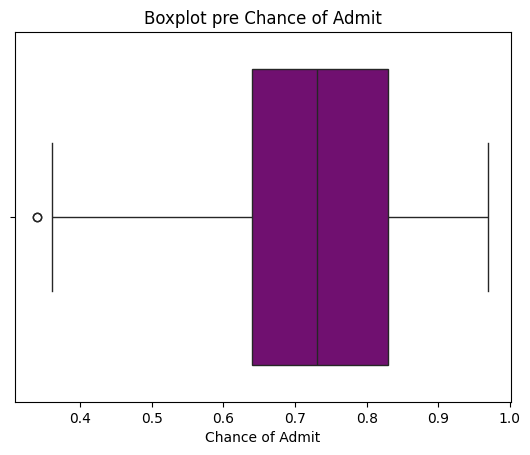

Number of outliers removed: 2


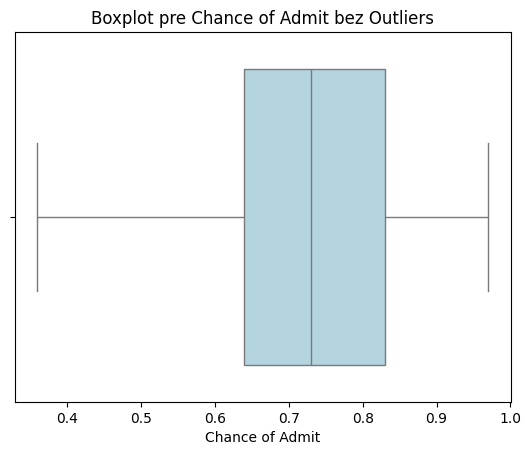

In [19]:
# Create a boxplot for 'Chance of Admit' to visually identify outliers
sns.boxplot(x=data['Chance_of_Admit'],color='purple')
plt.title('Boxplot pre Chance of Admit')
plt.xlabel('Chance of Admit')
plt.show()

# Identifying outliers based on the boxplot
Q1 = data['Chance_of_Admit'].quantile(0.25)
Q3 = data['Chance_of_Admit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


data_wirhout_outliers = data[(data['Chance_of_Admit'] >= lower_bound) & (data['Chance_of_Admit'] <= upper_bound)]

# Calculating the number of removed outliers
outliers_removed = len(data) - len(data_wirhout_outliers)
print(f"Number of outliers removed: {outliers_removed}")

# Show the new boxplot without outliers
sns.boxplot(x=data_wirhout_outliers['Chance_of_Admit'],color='lightblue')
plt.title('Boxplot pre Chance of Admit bez Outliers')
plt.xlabel('Chance of Admit')
plt.show()

# Result Task 4

 Values below the lower bound are considered extremely low and can be classified as outliers.
 Values bove the upper bound are considered extremely high and may also be classified as outliers as well.

 The outliers can be filtred by using <= > condition from origin data set
 

# Lineárna regresia

## Zadanie

1. Zostavte rovnicu pre lineárnu regresiu. Do rovnice zahrňte všetky premenné, ktoré dávajú zmysel. Pozor, možno bude potrebné premenovať názvy stĺpcov.
Odhadnite parametre lineárneho regresného modelu.
2. Interpretujte koeficienty modelu. Ktoré koeficienty sú štatisticky významné? 
3. Diskutujte, ktoré premenné majú najväčší vplyv na šance na prijatie a prečo.
4. Vyhodnoťte kvalitu fitu vášho lineárneho regresného modelu pomocou koeficientu determinácie R2.
5. Spočítajte Cookovu vzdialenosť pre jednotlivé body.
6. Vytvorte histogram pre Cookovu vzdialenosť. Je potrebné nejaké body odstrániť, pretože by príliš ovplyvňovali našu lineárnu regresiu?

## My solution
- import *statsmodels* library and method *formula.api* as sm
1. Define formula for linear regretion
    - Choosing the predictors,  based on the assumption that they significantly influence university admissions: GRE_Score, TOEFL_Score, University_Rating, SOP, LOR , CGPA and Research experience and defining the formula for model
    - specifing that "Chance of Admit" is linearly dependent on the listed predictors
    - using *+* in the formula indicates that each predictor is considered as an independent contributor to the predicted value
    - building the OLS model using the formula API
    - using the *ols()* method with the defined formula and data
    - printing the summary of the model by *.sumary()* method, which includes information about coefficients, statistical significance, and other metrics
2. and 3. Based on this summary I defined the Result for Taks 5 (find it below)
4. accessing the coefficient of determination, R-squared by *rsquered* method over the result of model.fit() 
5. usingoutliers_influence from statsmodel.stats library to calculate influacne and then using *cooks_distance* method to calculate cook distance
    - accesing the first index of arrays ([0]), where is cooks_d, contains the Cook's distance values for each observation in the dataset.
6.  for histogram using the *matplotlib.pyplot*  library
    - **The simple rule of thumb recommends removing values with a Cook's distance greater than 1**




                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Sun, 12 May 2024   Prob (F-statistic):          3.12e-134
Time:                        21:50:05   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2594      0.12

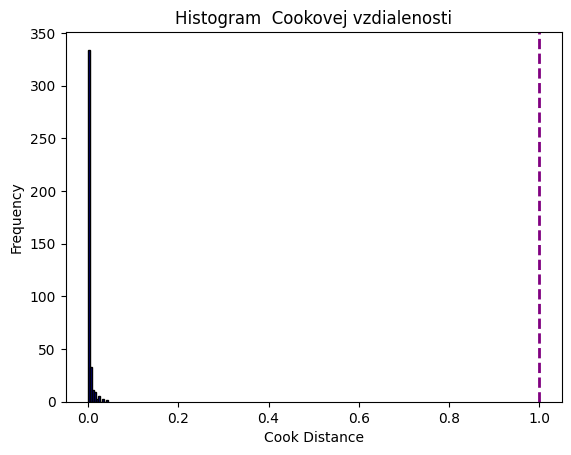

Number of points with Cook's Distance > 1: 0


In [40]:
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as olsInfluence

# Define the formula for the model
formula = "Chance_of_Admit ~ GRE_Score + TOEFL_Score + CGPA + SOP + LOR + University_Rating + Research"

# Build the OLS model using the formula 
model = smf.ols(formula=formula, data=data)

result = model.fit()

# Print the summary of the model 
print(result.summary())

# Accessing R^2
print("R-squared value:", result.rsquared)

#Cook Distance's calculation
influence = olsInfluence.OLSInfluence(result)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

# Plotting the histogram
plt.hist(data['Cook Distance'], bins=10, color='darkblue', edgecolor='black')
plt.title('Histogram  Cookovej vzdialenosti')
plt.xlabel('Cook Distance')
plt.ylabel('Frequency')

# Threshold line at Cook's distance = 1 due that rule
plt.axvline(x=1, color='purple', linestyle='dashed', linewidth=2)  
plt.show()

# Filtering out variables with Cook's distance greater than 1
high_influence_points = data[data['Cook Distance'] > 1]

# Displaying the number of points removed and optionally the data points themselves
print("Number of points with Cook's Distance > 1:", len(high_influence_points))




# Result Task 5

- coefficient is considered statistically significant if its p-value is less than **0.05** 
- based on this criterion, the following coefficients are statistically significant:

Intercept: p-value < 0.001
GRE_Score: p-value = 0.004
TOEFL_Score: p-value = 0.008
CGPA: p-value < 0.001
LOR: p-value < 0.001
Research: p-value = 0.002

These p-values indicate strong evidence against the null hypothesis so based on thad I conclude that these predictors significantly affect the "Chance of Admit".


**Most Influential Variables:**
-  Based on the coefficients and their significance the most influential are CGPA, LOR and Research.

*CGPA (0.1189)* is the most influential predictor, it has large and significant coefficient. So it be a critical factor in admissions

*LOR (0.0224)* and *Research (0.0245)* are also significant, so also these factors might reflect the applicant's success.

**Less Impactful Variables:**

- less impactful are nonsignificant Variables such as *SOP (-0.0033)* and  *University_Rating (0.0057)*.
So they have minimal effect on the chance of admission. 

This might be because SOP is subjective and less quantifiable compared to grades and test scores. 


**R-squared value:**
- is 0.8034713719824395, it is close to 1
- it means that the model can cover / explain cca 80.3% of the variability in the chances of admission. Over 80% can be consider as a good fit and effectivness in preddiction. The higher the  R-squared value the better the model explains the variability of the dependent variable.


**cook distance**
- Number of points with Cook's Distance > 1: 0
- there is no need to delete any  influential observations